In [ ]:
import numpy as numpy
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.models import load_model

**Mounting my Google Drive account in order to fetch the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! ls ../content/drive/MyDrive/Data/Rock-Paper-Scissors/test/paper

testpaper01-00.png  testpaper02-00.png	testpaper03-00.png  testpaper04-00.png
testpaper01-01.png  testpaper02-01.png	testpaper03-01.png  testpaper04-01.png
testpaper01-02.png  testpaper02-02.png	testpaper03-02.png  testpaper04-02.png
testpaper01-03.png  testpaper02-03.png	testpaper03-03.png  testpaper04-03.png
testpaper01-04.png  testpaper02-04.png	testpaper03-04.png  testpaper04-04.png
testpaper01-05.png  testpaper02-05.png	testpaper03-05.png  testpaper04-05.png
testpaper01-06.png  testpaper02-06.png	testpaper03-06.png  testpaper04-06.png
testpaper01-07.png  testpaper02-07.png	testpaper03-07.png  testpaper04-07.png
testpaper01-08.png  testpaper02-08.png	testpaper03-08.png  testpaper04-08.png
testpaper01-09.png  testpaper02-09.png	testpaper03-09.png  testpaper04-09.png
testpaper01-10.png  testpaper02-10.png	testpaper03-10.png  testpaper04-10.png
testpaper01-11.png  testpaper02-11.png	testpaper03-11.png  testpaper04-11.png
testpaper01-12.png  testpaper02-12.png	testpaper03-12.png  testp

**Counting The Training Images**

In [ ]:
for dir_ in ['paper','scissors','rock']:
  print(len([_ for _ in os.listdir('../content/drive/MyDrive/Data/Rock-Paper-Scissors/train/' + dir_) if _.endswith('.png')]),f'Files in {dir_}')

840 Files in paper
840 Files in scissors
840 Files in rock


**Viewing the Train Image Dataset**

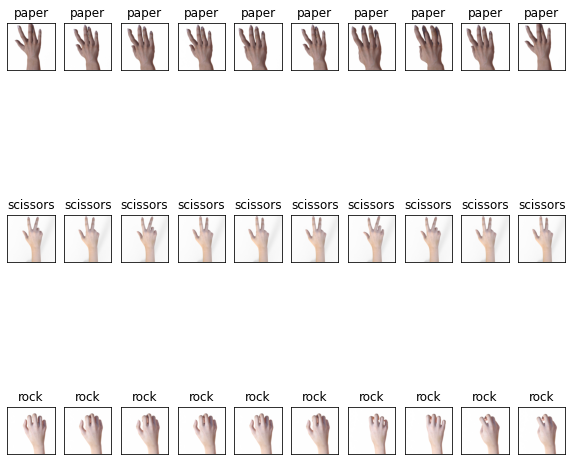

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

f,axarr = plt.subplots(3,10,figsize=(10,10))
i = 0
for dir_ in ['paper','scissors','rock']:
  for img in os.listdir(f'../content/drive/MyDrive/Data/Rock-Paper-Scissors/train/' + dir_)[:10]:
    subplot = axarr[i//10 , i%10]
    subplot.tick_params(left=False,right=False,labelleft = False,labelbottom = False , bottom = False)
    subplot.imshow(imread(f'../content/drive/MyDrive/Data/Rock-Paper-Scissors/train/{dir_}/' + img))
    subplot.title.set_text(dir_)
    i+=1

**Checking the size of the image**

In [ ]:
sizes = set()
for dir_ in ['paper','rock','scissors']:
  for file in os.listdir('../content/drive/MyDrive/Data/Rock-Paper-Scissors/train/' + dir_):
    sizes.add(imread('../content/drive/MyDrive/Data/Rock-Paper-Scissors/train/' + dir_ + '/' + file).shape)

In [ ]:
print(f'Total size in the dataset : {len(sizes)} and The Size : {sizes}')

Total size in the dataset : 1 and The Size : {(300, 300, 4)}


**Making a Training and Validation Set**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale = 1./255 , validation_split = 1-2048 / 2532)

train_generator = datagen.flow_from_directory(
    '../content/drive/MyDrive/Data/Rock-Paper-Scissors/train/',
    target_size = (300,300),
    batch_size = 64,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = datagen.flow_from_directory(
    '../content/drive/MyDrive/Data/Rock-Paper-Scissors/test/',
    target_size = (300,300),
    batch_size = 64,
    class_mode = 'categorical',
    subset = 'training'
)

Found 2040 images belonging to 3 classes.
Found 303 images belonging to 3 classes.


**Transfer-Learning**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():
  model = VGG16(
      include_top = False, #whether to include the 3 fully connected layer at the top of the network
      weights = 'imagenet', #Pre-Trained Model
      input_shape = (300,300,3),
      classifier_activation = "softmax" #Activation Function to be used at the top layer
  )

  return model

In [ ]:
model = load_model()
model.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                              

**Setting Up the Non-trainable Params**

In [ ]:
def set_Non_trainable_layers(model):
  for layer in model.layers:
    layer.trainable = False
  return model

model =set_Non_trainable_layers(model)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

**Sequential Model**

In [ ]:
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense
from tensorflow.keras.models import Sequential

In [ ]:
base_model = load_model()
base_model = set_Non_trainable_layers(base_model)
flattening_layer = Flatten() #Used to Flattens the input without affecting the batch size
dense_layer = Dense(256,activation='relu') #256-Units
prediction_layer = Dense(3,activation='softmax') #3-Unit (Rock-Paper-Scissor)

model = Sequential([
    base_model,
    flattening_layer,
    dense_layer,
    prediction_layer
])

In [ ]:
##Getting the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 9, 9, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 256)               10617088  
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 25,332,547
Trainable params: 10,617,859
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate = 1e-4)

In [ ]:
model.compile(metrics = ['accuracy'] , loss = 'categorical_crossentropy', optimizer = optimizer)

**Setting Up Two Useful Call Backs - EarlyStopping and ModelCheckPoint**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
es = EarlyStopping(patience = 2)
model_checkpoint_callback = ModelCheckpoint(
    filepath = 'model_checkpoints',
    save_weigths_only = True,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True
)

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 3,
    callbacks = [es,model_checkpoint_callback],
    use_multiprocessing = True,
    steps_per_epoch = 32,
    validation_steps = 32
)

Epoch 1/3
32/32 [==============================] - ETA: 0s - loss: 0.4233 - accuracy: 0.8500

32/32 [==============================] - 289s 9s/step - loss: 0.4233 - accuracy: 0.8500 - val_loss: 0.2101 - val_accuracy: 0.9029
Epoch 2/3
32/32 [==============================] - 61s 2s/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.3638 - val_accuracy: 0.8633
Epoch 3/3
32/32 [==============================] - 62s 2s/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.3062 - val_accuracy: 0.8705


**Testing the Model on a Random Sample**

In [ ]:
path = '../content/drive/MyDrive/Data/Rock-Paper-Scissors/validation/'
print(f'Total Number of Images in Testing: {len(os.listdir(path))}')

Total Number of Images in Testing: 33


In [ ]:
from keras.preprocessing import image
from tensorflow.keras.utils import load_img , img_to_array
import matplotlib.pyplot as ply
import numpy as np

In [ ]:
#Predicting Images Path
test_image_path = '../content/drive/MyDrive/Data/Rock-Paper-Scissors/validation/'

In [ ]:
#Preprocessing the image
def load_pre_process_img(path:str):
  img = load_img(path,target_size = (300,300)) #Image - Re-Sizing
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x,axis=0)
  image = np.vstack([x])
  return image

1/1 [==============================] - 0s 24ms/step


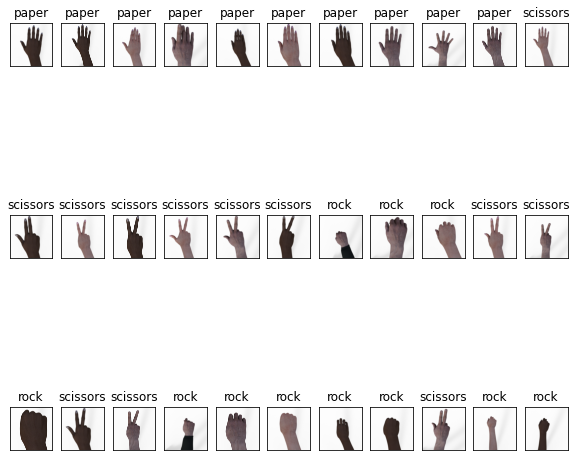

In [ ]:
#Plotting the Result
f,ax = plt.subplots(3,11,figsize=(10,10))
i = 0
for path in os.listdir(test_image_path):
  img_path = test_image_path + path
  subplot = ax[i // 11 , i % 11]
  subplot.tick_params(left=False,right=False,labelleft=False,labelbottom=False,bottom=False)
  subplot.imshow(imread(img_path))
  #model = load_model('../content/drive/MyDrive/RPS_CNN_vgg_16.h5')
  pred = model.predict(load_pre_process_img(img_path))
  subplot.title.set_text(['paper','rock','scissors'][np.argmax(pred)])
  i+=1

**Saving The Model For Future Purposes**

In [ ]:
from tensorflow.keras.models import save_model , load_model
save_model(model,'RPS_CNN_vgg_16.h5')

**Copy My Model to my Google Drive**

In [ ]:
! cp ../content/RPS_CNN_vgg_16.h5 ../content/drive/MyDrive/ -r